In [1]:
import tensorflow as tf
import shap

In [2]:
from tensorflow.keras.models import load_model

In [3]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

input_shape=(224, 224, 3)
img_input = Input(shape=input_shape)

base_model = DenseNet121(include_top=False, input_tensor=img_input, input_shape=input_shape, 
                         pooling="avg", weights='imagenet')
x = base_model.output
predictions = Dense(14, activation="sigmoid", name="predictions")(x)
model = Model(inputs=img_input, outputs=predictions)

2022-12-13 02:51:48.711548: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


29097984/29084464 [==============================] - 2s 0us/step


In [4]:
model.load_weights('../input/shap-nih/FP_32_NIH_Classification_weights.h5')

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [6]:
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough

In [7]:
shap.explainers._deep.deep_tf.op_handlers["FusedBatchNormV3"] = shap.explainers._deep.deep_tf.passthrough

In [8]:
import numpy as np

In [9]:
all_labels = ['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [10]:
train_x = np.load('../input/shap-nih/train_x.npy')
test_x = np.load('../input/shap-nih/test_x.npy')

In [11]:
explainer = shap.DeepExplainer(model, train_x[:])

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [12]:
shap_values = explainer.shap_values(test_x[:6])

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
2022-12-13 02:52:04.124902: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

Infiltration


<Figure size 648x432 with 0 Axes>

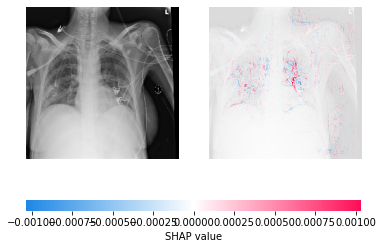

Nodule


<Figure size 648x432 with 0 Axes>

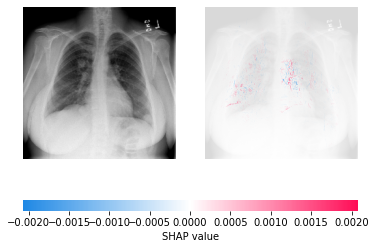

Infiltration


<Figure size 648x432 with 0 Axes>

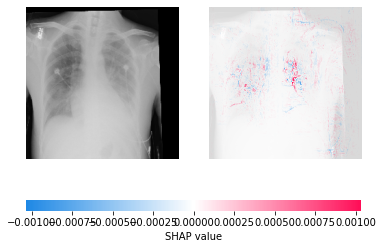

Infiltration


<Figure size 648x432 with 0 Axes>

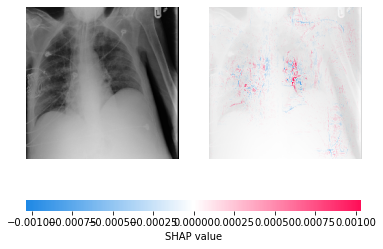

Infiltration


<Figure size 648x432 with 0 Axes>

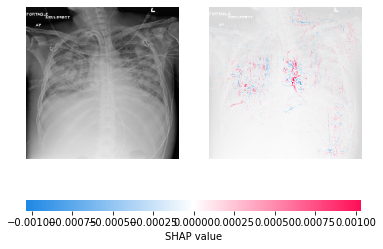

Infiltration


<Figure size 648x432 with 0 Axes>

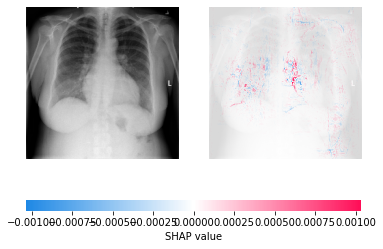

In [14]:
for i in range(6):
    plt.figure()
    predicted_class = np.argmax(model.predict(test_x[[i]]), axis = 1)[0]
    print(all_labels[predicted_class])
    shap.image_plot(shap_values[predicted_class], test_x[[i]])